In [27]:
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras import models
from keras import layers
# from keras.layers import Dense

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [6]:
word_index = reuters.get_word_index()

reverse_word_index = dict(
  (value, key) for (key, value) in word_index.items()
)

decoded_words = ' '.join([reverse_word_index.get(i - 3, "|") for i in reverse_word_index])

565248/550378 [==============================] - 1s 1us/step


In [7]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

In [8]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [11]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
model = Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation="softmax"))

In [17]:
model.compile(
  optimizer="rmsprop",
  loss="categorical_crossentropy",
  metrics=["accuracy"]
)

In [18]:
history = model.fit(
  X_train, y_train, epochs=20,
  batch_size=512, validation_split=0.2
)

Epoch 1/20
15/15 [==============================] - 7s 156ms/step - loss: 2.5325 - accuracy: 0.5019 - val_loss: 1.7292 - val_accuracy: 0.6338
Epoch 2/20
15/15 [==============================] - 1s 82ms/step - loss: 1.4051 - accuracy: 0.7013 - val_loss: 1.3546 - val_accuracy: 0.7078
Epoch 3/20
15/15 [==============================] - 1s 81ms/step - loss: 1.0660 - accuracy: 0.7704 - val_loss: 1.2035 - val_accuracy: 0.7262
Epoch 4/20
15/15 [==============================] - 1s 73ms/step - loss: 0.8505 - accuracy: 0.8203 - val_loss: 1.1029 - val_accuracy: 0.7524
Epoch 5/20
15/15 [==============================] - 1s 68ms/step - loss: 0.6806 - accuracy: 0.8554 - val_loss: 1.0331 - val_accuracy: 0.7741
Epoch 6/20
15/15 [==============================] - 1s 55ms/step - loss: 0.5482 - accuracy: 0.8856 - val_loss: 0.9725 - val_accuracy: 0.7896
Epoch 7/20
15/15 [==============================] - 1s 53ms/step - loss: 0.4442 - accuracy: 0.9069 - val_loss: 0.9572 - val_accuracy: 0.7902
Epoch 8/20
1

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

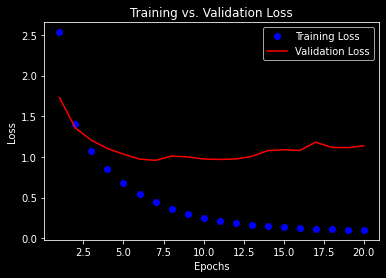

In [21]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss" )
plt.title("Training vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

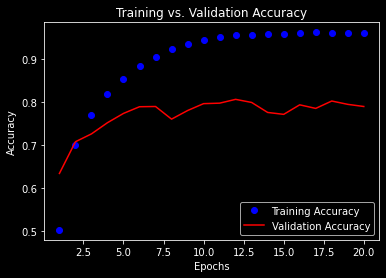

In [23]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy" )
plt.title("Training vs. Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [24]:
model_2 = Sequential()
model_2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(46, activation="softmax"))

model_2.compile(
  optimizer = "rmsprop",
  loss="categorical_crossentropy",
  metrics=["accuracy"]
)

history = model_2.fit(
  X_train, y_train, epochs=9,
  validation_split=0.2, batch_size=512
)

Epoch 1/9
15/15 [==============================] - 2s 95ms/step - loss: 2.6787 - accuracy: 0.5246 - val_loss: 1.7579 - val_accuracy: 0.6472
Epoch 2/9
15/15 [==============================] - 1s 57ms/step - loss: 1.4724 - accuracy: 0.6939 - val_loss: 1.3728 - val_accuracy: 0.6900
Epoch 3/9
15/15 [==============================] - 1s 64ms/step - loss: 1.1052 - accuracy: 0.7571 - val_loss: 1.2221 - val_accuracy: 0.7284
Epoch 4/9
15/15 [==============================] - 1s 70ms/step - loss: 0.8949 - accuracy: 0.8097 - val_loss: 1.1426 - val_accuracy: 0.7579
Epoch 5/9
15/15 [==============================] - 1s 61ms/step - loss: 0.7249 - accuracy: 0.8512 - val_loss: 1.0873 - val_accuracy: 0.7618
Epoch 6/9
15/15 [==============================] - 1s 74ms/step - loss: 0.5996 - accuracy: 0.8810 - val_loss: 1.0386 - val_accuracy: 0.7641
Epoch 7/9
15/15 [==============================] - 1s 65ms/step - loss: 0.4941 - accuracy: 0.8988 - val_loss: 0.9869 - val_accuracy: 0.7858
Epoch 8/9
15/15 [===

In [25]:
history_dict = history.history

In [26]:
results = model_2.evaluate(X_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9878 - accuracy: 0.7898


In [28]:
test_labels_copy = copy.copy(y_test)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array) / len(test_labels))

C:\Users\DAVID-~1\AppData\Local\Temp/ipykernel_15792/1416413187.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  hits_array = np.array(test_labels) == np.array(test_labels_copy)


0.0

In [31]:
model = Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(
  optimizer='rmsprop',
  loss="categorical_crossentropy",
  metrics=["accuracy"]
)

model.fit(
  X_train, y_train, epochs=20,
  batch_size=128,
  validation_split=0.2
)


Epoch 1/20
57/57 [==============================] - 4s 51ms/step - loss: 1.8556 - accuracy: 0.5872 - val_loss: 1.3835 - val_accuracy: 0.6628
Epoch 2/20
57/57 [==============================] - 2s 36ms/step - loss: 1.0324 - accuracy: 0.7581 - val_loss: 1.2509 - val_accuracy: 0.6934
Epoch 3/20
57/57 [==============================] - 2s 37ms/step - loss: 0.6851 - accuracy: 0.8416 - val_loss: 1.1072 - val_accuracy: 0.7373
Epoch 4/20
57/57 [==============================] - 2s 41ms/step - loss: 0.4536 - accuracy: 0.8976 - val_loss: 1.2453 - val_accuracy: 0.7396
Epoch 5/20
57/57 [==============================] - 2s 42ms/step - loss: 0.3136 - accuracy: 0.9279 - val_loss: 1.2126 - val_accuracy: 0.7435
Epoch 6/20
57/57 [==============================] - 2s 38ms/step - loss: 0.2380 - accuracy: 0.9461 - val_loss: 1.1583 - val_accuracy: 0.7980
Epoch 7/20
57/57 [==============================] - 2s 39ms/step - loss: 0.1867 - accuracy: 0.9556 - val_loss: 1.1997 - val_accuracy: 0.7908
Epoch 8/20
57